# Test Cvdp Time Handling

Currently this workbook only shows that it produces a useable array of time objects. There is no limit testing etc.

In [67]:
import sys
sys.path.append('../')
import helpers.cvdpTime as cvdpTime

First load up the cvdp and figure out which indexes we want to calculate

In [68]:
import xarray

In [69]:
cvdp = xarray.open_dataset(
    'E:/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.001.cvdp_data.850-2005.nc',
                           decode_times=False
)

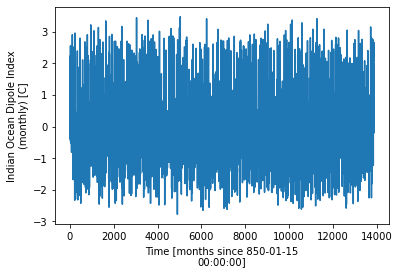

In [70]:
iodCvdp = cvdp.indian_ocean_dipole
del cvdp

#just plot something for sanity
iodCvdp.plot()

In [71]:
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
array([-0.078038,  0.185412,  0.826396, ...,  2.605735,  2.48158 ,  2.09342 ],
      dtype=float32)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.387e+04 1.387e+04 1.387e+04
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

In [72]:
len(iodCvdp.time)

13872

In [73]:
iodCvdp = cvdpTime.decodeTime(iodCvdp)
iodCvdp

<xarray.DataArray 'indian_ocean_dipole' (time: 13872)>
array([-0.078038,  0.185412,  0.826396, ...,  2.605735,  2.48158 ,  2.09342 ],
      dtype=float32)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00
Attributes:
    comment_cvdp:  area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)
    units:         C
    long_name:     Indian Ocean Dipole Index (monthly)

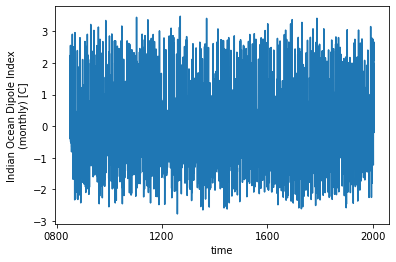

In [74]:
iodCvdp.plot.line()

In [75]:
# should be jan 850
startTime = iodCvdp.time.values[0]

try:
    if (startTime.year!=850 or startTime.month!=1):
        raise 'start time appears wrong'
except:
    print('start time appears wrong')
    print(startTime)   


In [76]:
# should be jan 850
startTime = iodCvdp.time.values[-1]

try:
    if (startTime.year!=2005 or startTime.month!=12):
        raise 'start time appears wrong'
except:
    print('start time appears wrong')
    print(startTime)   
# should be dec 2005